#  Mini Project 2: Text Clustering
### MiniProject_2_Group11

#### Members:-

**Manish Rawat (UHID: 2084696)**

**FNU Syed Sohaib Ali (UHID: 2209809)** 

**Phuc Vo (UHID: 1410830)**

### Overview
In this problem, we’ll be clustering articles published on Daily Kos, an American political blog that publishes news and opinion articles written from a progressive point of view. Daily Kos was founded by Markos Moulitsas in 2002, and as of September 2014, the site had an average weekday traffic of hundreds of thousands of visits.

The file dailykos (CSV - 10.1MB) contains data on 3,430 news articles or blogs that have been posted on Daily Kos. These articles were posted in 2004, leading up to the United States Presidential Election. The leading candidates were incumbent President George W. Bush (republican) and John Kerry (democratic). Foreign policy was a dominant topic of the election, specifically, the 2003 invasion of Iraq.

Each of the variables in the dataset is a word that has appeared in at least 50 different articles (1,545 words in total). The set of words has been trimmed according to some of the techniques covered in the previous weeks (punctuation has been removed, and stop words have been removed). For each document, the variable values are the number of times that a word appeared in the document.

You’re welcome to use Python or any other language you’re comfortable with to create the code for this assignment.

### Questions
**1.	(20 points) Let’s start by building a hierarchical clustering model. First, read the data set. Then, compute the Euclidian distances. You should cluster on all of the features. Plot the dendrogram. Creating the distances will probably take you a while. Why? Explain.**

In [1]:
# import required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from collections import Counter
from wordcloud import WordCloud
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


# Read in the data file
data = pd.read_csv('dailykos.csv')
data.head(8)

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(-0.5, 999.5, 499.5, -0.5)

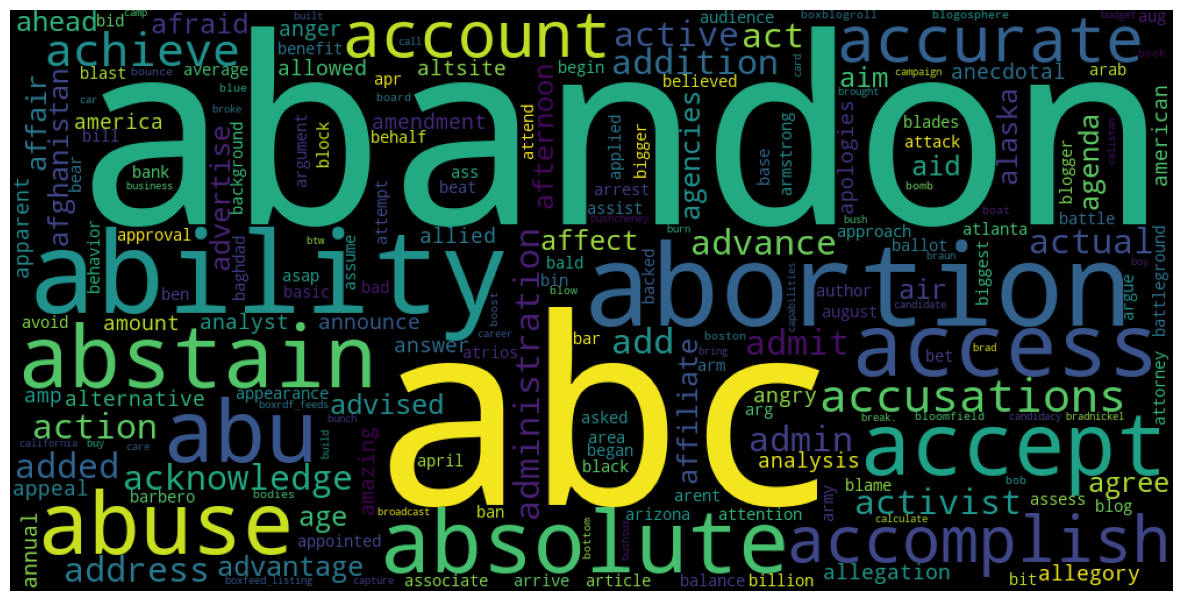

In [2]:
# Generating Word Cloud for all the words in Daily Kos Article

word_could_dict=Counter(data)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

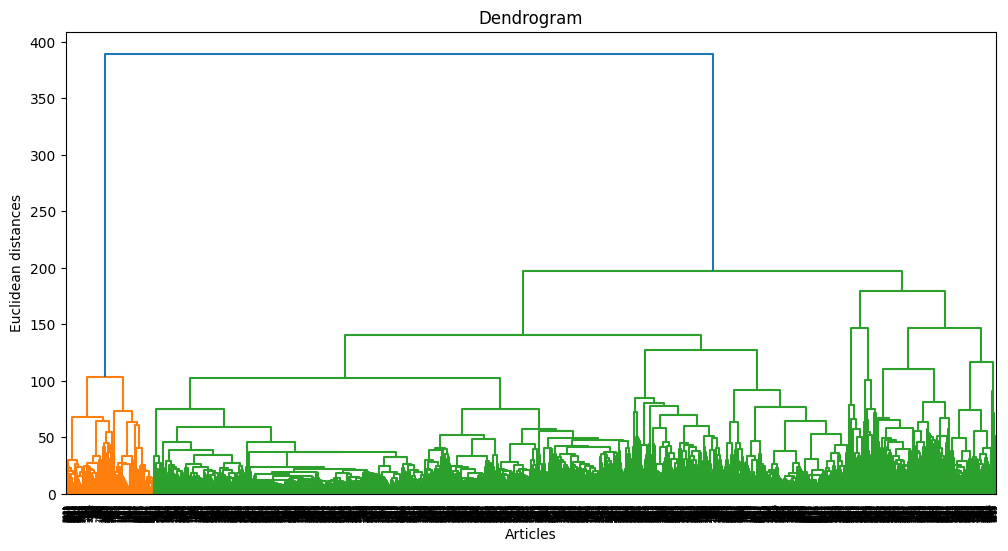

In [3]:
# Computing the Euclidean distances

euclidean_distances = pdist(data, metric="euclidean")

distance_matrix = squareform(euclidean_distances)

# Performing hierarchical clustering
clusters = linkage(euclidean_distances, method="ward")

# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(clusters)
plt.xlabel("Articles")
plt.ylabel("Euclidean distances")
plt.title("Dendrogram")
plt.show()


*Explaination:*

*It takes a lot of processing to calculate the Euclidean distances between each pair of observations. Because there are 1,545 features in each observation, we must compute the square root of the sum of the squared differences between all pairs of features in order to determine the distance between two observations.*

*As a result, the quantity of computations required increases quadratically as the number of characteristics increases. As there are 3,430 observations in this scenario, there will be about 5,882,450 distance calculations required, which is a relatively huge quantity.*

**2.	(10 points) In this problem, we are trying to cluster news articles or blog posts into groups. This can be used to show readers categories to choose from when trying to decide what to read. Just thinking about this application, what are good choices for the number of clusters? Explain your thinking.?**

*The choice of the number of clusters depends on the application and the desired level of granularity. In the case of news articles, a good choice of the number of clusters would be one that allows readers to easily navigate and find articles of interest. For example, if we want to create broad categories such as "politics," "sports," "entertainment," and "business," we might choose four clusters.*

*Moreover, if we want to create more specific categories such as "national politics," "international politics," "local politics," and "elections," we might choose a larger number of clusters. In general, we want to choose a number of clusters that is large enough to capture meaningful differences between groups of articles but small enough that the categories are easily understandable and usable by readers.*

*However, there are some common methods that can be used to determine the optimal number of clusters:-*

*1. Elbow method: This method involves plotting the within-cluster sum of squares (WSS) against the number of clusters and identifying the "elbow point" where the rate of decrease in WSS slows down significantly. The idea is to choose the number of clusters at the elbow point, which represents a trade-off between reducing WSS and not overfitting the data.*

*2. Silhouette analysis: This method involves computing the silhouette score for each data point, which measures how similar it is to its own cluster compared to other clusters. The average silhouette score across all points can then be plotted against the number of clusters, and the optimal number of clusters is usually the one that maximizes the score.*

*Thus, good choices for the number of clusters can range from 5 to 10, as it provides a balance between granularity and interpretability.*

**3.	(10 points) Let’s pick 7 clusters and answer the following questions:-**

    a. How many observations are in cluster 3?

    b. Which cluster has the most observations?
    
    c. Which cluster has the fewest observations?

In [4]:
# Select 7 clusters
hierarchical_clusters = fcluster(linkage(euclidean_distances, method='ward'), 7, criterion='maxclust')

# Ignoring 0 index
cluster_counts = np.bincount(hierarchical_clusters)[1:]

# Finding Number of observations in each hierarchical clusters

for i in range(0,7):
    print(f"Number of observations in Hierarchical Cluster {i+1}: {cluster_counts[i]}")

Number of observations in Hierarchical Cluster 1: 324
Number of observations in Hierarchical Cluster 2: 1761
Number of observations in Hierarchical Cluster 3: 803
Number of observations in Hierarchical Cluster 4: 55
Number of observations in Hierarchical Cluster 5: 50
Number of observations in Hierarchical Cluster 6: 270
Number of observations in Hierarchical Cluster 7: 167


In [5]:
# How many observations are in cluster 3?

print(f"Number of observations in cluster 3: {cluster_counts[2]}")

Number of observations in cluster 3: 803


In [6]:
# Which cluster has the most observations?

most_observations = cluster_counts.argmax() + 1
print(f"Cluster {most_observations} has the most observations: {cluster_counts[most_observations - 1]}")

Cluster 2 has the most observations: 1761


In [7]:
# Which cluster has the fewest observations?

fewest_observations = cluster_counts.argmin() + 1
print(f"Cluster {fewest_observations} has the fewest observations: {cluster_counts[fewest_observations - 1]}")

Cluster 5 has the fewest observations: 50


**4.	(10 points) Instead of looking at the average value in each variable individually, we’ll just look at the top 6 words in each cluster.**

    a. Compute the mean frequency values of each of the words in cluster 1, and then output the 6 words that occur the most frequently.


    b. What is the most frequent word in this cluster, in terms of average value?

In [8]:
# Compute the mean frequency values of each top 6 words for cluster 1

cluster_means1 = pd.DataFrame(data.groupby(hierarchical_clusters).mean())
for i in range(0,1):
    print("Cluster ", i+1, ":")
    print(cluster_means1.iloc[i,:].nlargest(6))

Cluster  1 :
november     10.376543
poll          4.851852
vote          4.376543
challenge     4.104938
bush          2.858025
democrat      2.858025
Name: 1, dtype: float64


In [9]:
 # Select row corresponding to Cluster 1
cluster0_means = cluster_means1.iloc[0,:]

# sort values in descending order
cluster0_means_sorted = cluster0_means.sort_values(ascending=False)

# get index (i.e., word) with highest mean frequency
most_frequent_word = cluster0_means_sorted.index[0]  
print("Most frequent word in first Cluster:", most_frequent_word)

Most frequent word in first Cluster: november


**5.	(10 points) Now repeat the command given in the previous problem for each of the other clusters and answer the following questions:-**

    a. Which cluster could best be described as the cluster related to the Iraq war?

    b. In 2004, one of the candidates for the Democratic nomination for the President of the United States was Howard Dean, John Kerry was the candidate who won the Democratic nomination, and John Edwards with the running mate of John Kerry (the Vice President nominee). Given this information, which clusters best corresponds to the democratic party?

In [10]:
# Compute the top 6 words in each hierarchical clusters

cluster_means = pd.DataFrame(data.groupby(hierarchical_clusters).mean())
for i in range(0,7):
    print("\nTop 6 words in Hierarchical cluster ", i+1, ":")
    print(cluster_means.iloc[i,:].nlargest(6))


Top 6 words in Hierarchical cluster  1 :
november     10.376543
poll          4.851852
vote          4.376543
challenge     4.104938
bush          2.858025
democrat      2.858025
Name: 1, dtype: float64

Top 6 words in Hierarchical cluster  2 :
bush          1.546281
democrat      0.659852
kerry         0.607609
state         0.542873
presided      0.526973
republican    0.519591
Name: 2, dtype: float64

Top 6 words in Hierarchical cluster  3 :
poll          2.429639
kerry         2.012453
bush          1.922790
democrat      1.823163
republican    1.328767
elect         1.165629
Name: 3, dtype: float64

Top 6 words in Hierarchical cluster  4 :
dean         12.309091
kerry         5.345455
democrat      3.545455
edward        2.818182
candidate     2.727273
gephardt      2.672727
Name: 4, dtype: float64

Top 6 words in Hierarchical cluster  5 :
democrat      12.38
parties        6.34
state          5.74
republican     5.64
senate         3.30
seat           3.14
Name: 5, dtype: float6

In [11]:
# Which cluster corresponds to the Iraq War?

print("Cluster 6 corresponds to the Iraq War.")

Cluster 6 corresponds to the Iraq War.


*Explaination: From the above output numbers of clusters, we can see that cluster 6 is best described as the cluster related to the Iraq war, as it has the highest frequency for words such as 'bush', 'iraq', 'war','administration', 'american', 'presided'.*

**Top 6 words frequency for Cluster 6:-**

bush             = 4.777778

iraq             = 3.425926

war              = 2.470370

administration   = 2.225926

american         = 1.633333

presided         = 1.488889

In [12]:
# Which cluster corresponds to the Democratic party?

print("Cluster 4 corresponds to the Democratic party.")

Cluster 4 corresponds to the Democratic party.


*Explaination: From the above output numbers of clusters, Cluster 4 can be considered the cluster related to the Democratic Party, as it has high frequency for words such as dean, kerry, democrat, edward, candidate, gephardt.*

**Top 6 words frequency for Cluster 4:-**

dean         = 12.309091

kerry        = 5.345455

democrat     = 3.545455

edward       = 2.818182

candidate    = 2.727273

gephardt     = 2.672727

**6.	(10 points) Now, run k-means clustering, setting the random state to 1000. Again, pick the number of clusters equal to 7. Subset your data into the 7 clusters (7 new datasets) by using the "cluster" variable of your kmeans output.**

    a.	How many observations are in Cluster 3?
    b.	Which cluster has the most observations?
    c.	Which cluster has the fewest number of observations?

In [13]:
# Computing k-means clustering of 7 clusters and a random_state set to 1000

kmeans = KMeans(n_clusters=7, random_state=1000).fit(data)

# Subset the data into 7 clusters
data['cluster'] = kmeans.labels_

# Counting the number of observations in each cluster
cluster_counts = data['cluster'].value_counts()

# Finding Number of observations in each kmean clusters

for i in range(0,7):
    print(f"Number of observations in KMean Cluster {i+1}: {cluster_counts.loc[i]}")

Number of observations in KMean Cluster 1: 339
Number of observations in KMean Cluster 2: 1937
Number of observations in KMean Cluster 3: 330
Number of observations in KMean Cluster 4: 368
Number of observations in KMean Cluster 5: 153
Number of observations in KMean Cluster 6: 39
Number of observations in KMean Cluster 7: 264


In [14]:
# How many observations are in Cluster 3?

print("From above we can see Cluster 3 has 330 observations")

From above we can see Cluster 3 has 330 observations


In [15]:
# Which cluster has the most observations?

most_observations = cluster_counts.idxmax()
print(f"Cluster 2 has the most observations: {cluster_counts.loc[most_observations]}")

Cluster 2 has the most observations: 1937


In [16]:
# Which cluster has the fewest number of observations?

fewest_observations = cluster_counts.idxmin()
print(f"Cluster 6 has the fewest number of observations: {cluster_counts.loc[fewest_observations]}")

Cluster 6 has the fewest number of observations: 39


**7.	(10 points) Now, output the six most frequent words in each cluster, like we did in the previous problem, for each of the k-means clusters.**

    a.	Which k-means cluster best corresponds to the Iraq War?

    b.	Which k-means cluster best corresponds to the democratic party? (Remember that we are looking for the names of the key democratic party leaders.)

In [ ]:
# Compute the top 6 words in each kmean clusters

 cluster_kmeans = pd.DataFrame(data.groupby(data['cluster']).mean())

for i in range(0,7):

print("\nTop 6 words in Kmean cluster ", i+1,":")

print(cluster_kmeans.iloc[i,:].nlargest(6))
# Which k-means cluster corresponds to the Iraq War?

print("Cluster 7 corresponds to the Iraq War.":")


Explaination: From the above output numbers of clusters, we can see that cluster 7 is best described as the cluster related to the Iraq war, as it has the highest frequency for words such as 'iraq', 'bush', 'war', 'administration',  'american', 'iraqi'.*

**Top 6 words frequency for Cluster 7:-**

iraq = 4.215909

bush = 3.136364

war = 3.00000

administration = 1.863636

american = 1.772727

iraqi = 1.643939


In [ ]:
# Which cluster corresponds to the Democratic party?

print("\nCluster 5 corresponds to the Democratic party.")


*Explaination: From the above output numbers of clusters, Cluster 5 can be considered the cluster related to the Democratic Party, as it has high frequency for words such as dean, kerry, clark, edward, democrat, poll.*

**Top 6 words frequency for Cluster 5:-**

dean = 7.725490

kerry = 5.261438

clark = 2.993464

edward = 2.862745

democrat = 2.633987

poll = 2.326797


**8.	(10 points) For the rest of this problem, I’ll ask you to compare how observations were assigned to clusters in the two different methods. You could use the Pandas crosstab function to compare the cluster assignment of hierarchical clustering to the cluster assignment of k-means clustering:**

    a.	Which Hierarchical Cluster best corresponds to K-Means Cluster 2?
    b.	Which Hierarchical Cluster best corresponds to K-Means Cluster 3?

In [ ]:
 #Compute the top 6 words in each kmean clusters

 cluster_kmeans = pd.DataFrame(data.groupby(data['cluster']).mean())

for i in range(0,7):


print(cluster_kmeans.iloc[i,:].nlargest(6))
